In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv('train_cleaned02.csv', index_col=0)
train.head()

,VehicleID,Location,Maker,Model,Year,Colour,Amount (Million Naira),Type,Distance
2200,VHL15679,Ibadan,Honda,Accord 2.4 Type S Automatic,2004,Purple,0.68,Nigerian Used,304483.00
272,VHL13679,Lagos,Lexus,GX 460 Luxury,2016,White,27.00,Foreign Used,65000.00
6502,VHL13968,Abuja,Toyota,Corolla,2009,Gray,1.55,Nigerian Used,149082.71
4315,VHL16270,Abuja,Hyundai,Sonata,2011,Gray,3.20,Foreign Used,100000.00
4138,VHL11347,Lagos,Toyota,Camry,2009,Gray,3.25,Foreign Used,70000.00


In [3]:
train.Location.value_counts()

Lagos     3310
Abuja     3254
Ibadan     624
Name: Location, dtype: int64

In [4]:
train.shape

(7188, 9)

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7188 entries, 2200 to 479
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   VehicleID               7188 non-null   object 
 1   Location                7188 non-null   object 
 2   Maker                   7188 non-null   object 
 3   Model                   7188 non-null   object 
 4   Year                    7188 non-null   int64  
 5   Colour                  7188 non-null   object 
 6   Amount (Million Naira)  7188 non-null   float64
 7   Type                    7188 non-null   object 
 8   Distance                7188 non-null   float64
dtypes: float64(2), int64(1), object(6)
memory usage: 561.6+ KB


In [6]:
train.isnull().sum()

VehicleID                 0
Location                  0
Maker                     0
Model                     0
Year                      0
Colour                    0
Amount (Million Naira)    0
Type                      0
Distance                  0
dtype: int64

In [7]:
train.duplicated().sum()

0

There are no null values of duplicates in this data. I will proceed to drop irrelevant features.

In [8]:
len(train.Model.unique())

1221

In [9]:
test = pd.read_csv('test_cleaned02.csv',index_col=0)
test.head()

,VehicleID,Location,Maker,Model,Year,Colour,Type,Distance
44,VHL16720,Lagos,Mercedes-Benz,GLK-Class,2015,White,Foreign Used,90903.72
1551,VHL10567,Ibadan,Toyota,Matrix,2004,Blue,Foreign Used,153807.00
566,VHL14168,Abuja,Toyota,Rav4,2007,Black,Brand New,120050.00
1129,VHL19965,Lagos,Lexus,ES,2007,White,Foreign Used,36580.00
84,VHL12369,Ibadan,Mercedes-Benz,C-Class C 350 (S204),2009,Black,Foreign Used,110891.00


In [10]:
test.shape

(2061, 8)

In [11]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2061 entries, 44 to 377
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   VehicleID  2061 non-null   object 
 1   Location   2061 non-null   object 
 2   Maker      2061 non-null   object 
 3   Model      2061 non-null   object 
 4   Year       2061 non-null   int64  
 5   Colour     2061 non-null   object 
 6   Type       2061 non-null   object 
 7   Distance   2061 non-null   float64
dtypes: float64(1), int64(1), object(6)
memory usage: 144.9+ KB


In [12]:
test.isnull().sum()

VehicleID    0
Location     0
Maker        0
Model        0
Year         0
Colour       0
Type         0
Distance     0
dtype: int64

In [13]:
test.duplicated().sum()

0

There are no null values of duplicates in this data. I will proceed to drop irrelevant features.

In [14]:
len(test.Model.unique())

587

Creating dummy variables for the object column

In [15]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [16]:
train['Location'] = le.fit_transform(train['Location'])
train['Maker'] = le.fit_transform(train['Maker'])
train['Colour'] = le.fit_transform(train['Colour'])
train['Type'] = le.fit_transform(train['Type'])

In [17]:
test['Location'] = le.fit_transform(test['Location'])
test['Maker'] = le.fit_transform(test['Maker'])
test['Colour'] = le.fit_transform(test['Colour'])
test['Type'] = le.fit_transform(test['Type'])

In [18]:
train.Colour.value_counts()

1     2118
7     1152
16    1120
19    1018
2      553
15     478
6      356
8      179
3      114
4       26
0       25
14      16
11      11
20       7
13       7
9        3
12       1
5        1
18       1
17       1
10       1
Name: Colour, dtype: int64

In [19]:
train.head()

,VehicleID,Location,Maker,Model,Year,Colour,Amount (Million Naira),Type,Distance
2200,VHL15679,1,17,Accord 2.4 Type S Automatic,2004,14,0.68,2,304483.00
272,VHL13679,2,29,GX 460 Luxury,2016,19,27.00,1,65000.00
6502,VHL13968,0,52,Corolla,2009,7,1.55,2,149082.71
4315,VHL16270,0,19,Sonata,2011,7,3.20,1,100000.00
4138,VHL11347,2,52,Camry,2009,7,3.25,1,70000.00


In [20]:
test.head()

,VehicleID,Location,Maker,Model,Year,Colour,Type,Distance
44,VHL16720,2,24,GLK-Class,2015,16,1,90903.72
1551,VHL10567,1,37,Matrix,2004,3,1,153807.00
566,VHL14168,0,37,Rav4,2007,2,0,120050.00
1129,VHL19965,2,20,ES,2007,16,1,36580.00
84,VHL12369,1,24,C-Class C 350 (S204),2009,2,1,110891.00


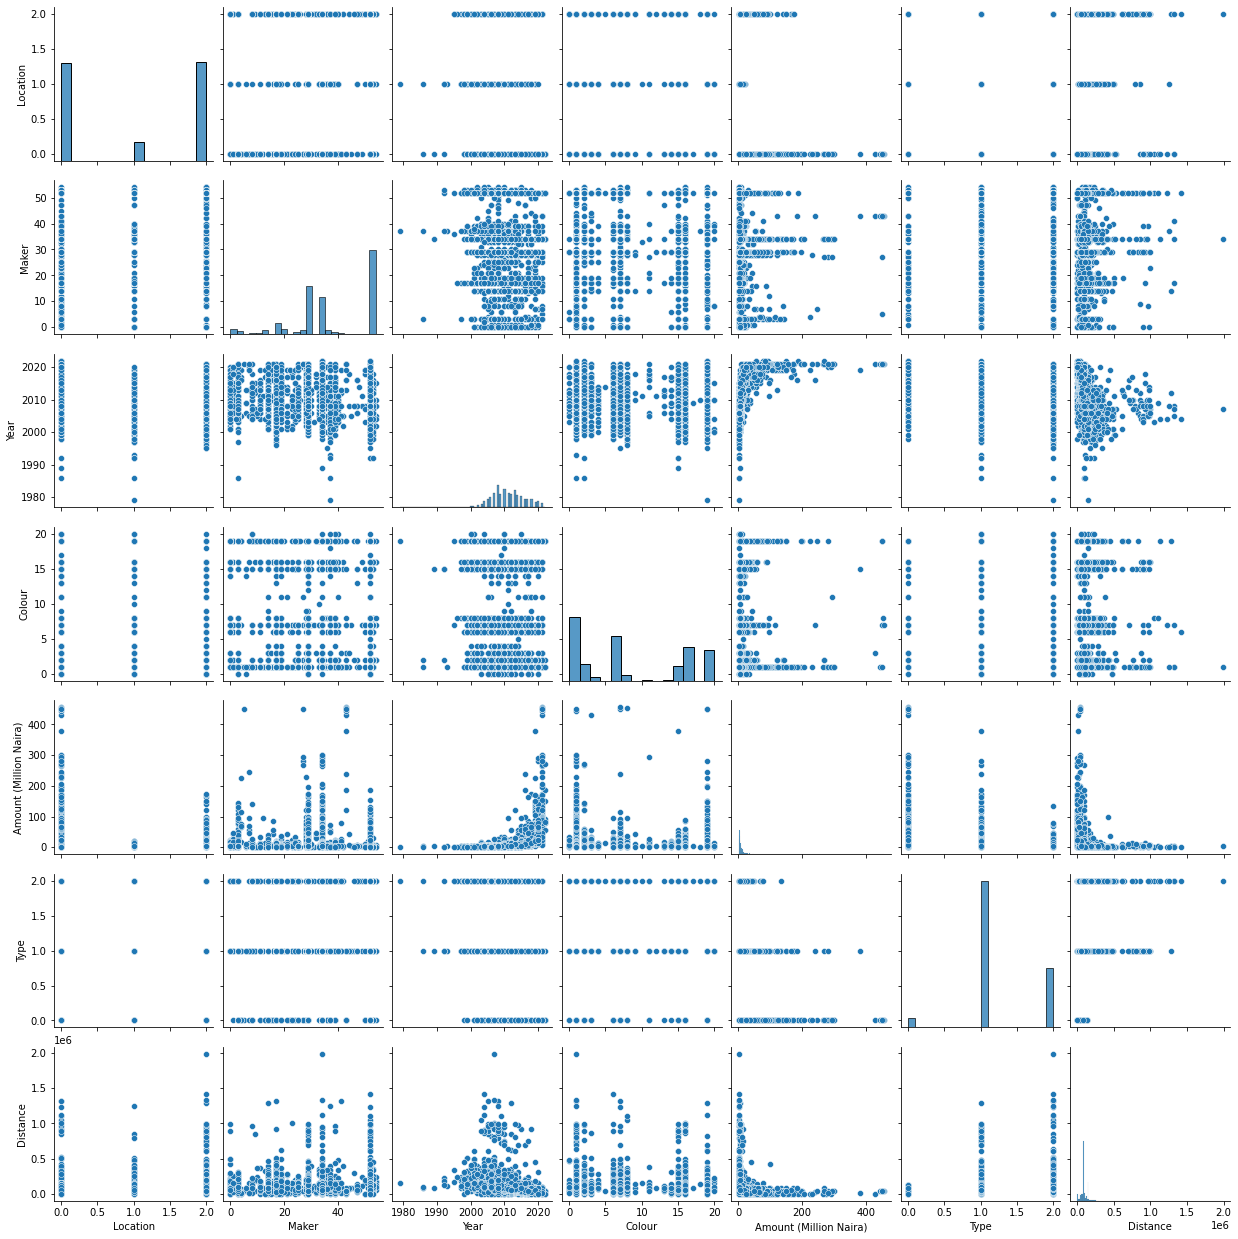

In [22]:
sns.pairplot(train.iloc[:,:])

In [188]:
# drop the Model and vehicleID columns
x = train.drop(['VehicleID','Model','Amount (Million Naira)','Year'], axis=1)
y = train['Amount (Million Naira)']

In [189]:
# drop the Model and vehicleID columns
X_test = test.drop(['VehicleID','Model'], axis=1)

In [190]:
x.head()

,Location,Maker,Colour,Type,Distance
2200,1,17,14,2,304483.00
272,2,29,19,1,65000.00
6502,0,52,7,2,149082.71
4315,0,19,7,1,100000.00
4138,2,52,7,1,70000.00


In [191]:
X_test.head()

,Location,Maker,Year,Colour,Type,Distance
44,2,24,2015,16,1,90903.72
1551,1,37,2004,3,1,153807.00
566,0,37,2007,2,0,120050.00
1129,2,20,2007,16,1,36580.00
84,1,24,2009,2,1,110891.00


## Modelling

In [192]:
from sklearn.model_selection import train_test_split

In [193]:
x_train, x_test,y_train, y_test = train_test_split(x,y, test_size=0.15, random_state=1234)

## Linear Regression

In [194]:
from sklearn.linear_model import LinearRegression

In [195]:
LR = LinearRegression()

In [196]:
LR.fit(x_train,y_train)

LinearRegression()

In [197]:
LR_pred = LR.predict(x_test)

In [198]:
from sklearn.metrics import mean_squared_error

In [199]:
LR_mse = mean_squared_error(LR_pred,y_test)
LR_mse

898.988776415838

In [200]:
LR_rmse = np.sqrt(LR_mse)
LR_rmse

29.983141536800943

## Decission Trees Model

In [201]:
from sklearn.tree import DecisionTreeRegressor

In [202]:
DTR = DecisionTreeRegressor()

In [203]:
DTR.fit(x_train,y_train)

DecisionTreeRegressor()

In [204]:
DTR_pred = DTR.predict(x_test)

In [205]:
# from sklearn.metrics import mean_squared_error

In [206]:
DTR_mse = mean_squared_error(DTR_pred,y_test)
DTR_mse

358.77741543049234

In [207]:
DTR_rmse = np.sqrt(DTR_mse)
DTR_rmse

18.94142062862478

## Random Forest Model

In [208]:
from sklearn.ensemble import RandomForestRegressor

In [209]:
RFR = RandomForestRegressor()

In [210]:
RFR.fit(x_train,y_train)

RandomForestRegressor()

In [211]:
RFR_pred = RFR.predict(x_test)

In [212]:
# from sklearn.metrics import mean_squared_error

In [213]:
RFR_mse = mean_squared_error(RFR_pred,y_test)
RFR_mse

345.08137669114643

In [150]:
RFR_rmse = np.sqrt(RFR_mse)
RFR_rmse

16.000957847289257

## Gradient Boosting Model

In [151]:
from sklearn.ensemble import GradientBoostingRegressor

In [152]:
GBR = GradientBoostingRegressor()

In [153]:
GBR.fit(x_train,y_train)

GradientBoostingRegressor()

In [154]:
GBR_pred = GBR.predict(x_test)

In [155]:
# from sklearn.metrics import mean_squared_error

In [156]:
GBR_mse = mean_squared_error(GBR_pred,y_test)
GBR_mse

227.3044116786627

In [157]:
GBR_rmse = np.sqrt(GBR_mse)
GBR_rmse

15.076618045127452

## Support Vector Machine

In [57]:
from sklearn.svm import SVR

In [58]:
SVM = SVR()

In [59]:
SVM.fit(x_train,y_train)

SVR()

In [60]:
SVM_pred = SVM.predict(x_test)

In [61]:
# from sklearn.metrics import mean_squared_error

In [62]:
SVM_mse = mean_squared_error(SVM_pred,y_test)
SVM_mse

948.3189575818611

In [63]:
SVM_rmse = np.sqrt(SVM_mse)
SVM_rmse

30.794787831414933

## Gradient Boosting Model

In [103]:
test_pred = GBR.predict(X_test)
test_pred

array([ 14.27964881,   5.36112536,   6.09350274, ..., 159.3100674 ,
       114.66814184,  46.02712011])

In [104]:
# file = 
pd.DataFrame({'VehicleID':test['VehicleID'], 'Amount (Million Naira)':test_pred}).to_csv('submission_07.csv', index=False)